In [80]:
import numpy as np
import pandas as pd
import sympy 
from sympy import Symbol
from sympy import *
#from numpy import *
from matplotlib.pyplot import *
from sympy.plotting import plot3d
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import plot_implicit
from sklearn import linear_model as lm
%matplotlib inline
xx, yy, zz, m,b=symbols("xx yy zz m b")

In [81]:
data = pd.read_csv('../../train.csv')

In [82]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
#data cleansing 


median =data["Age"].median()
data["Age"] = data["Age"].fillna(median)

data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

red = data [["Survived","Pclass","Sex","Age","Fare"]]
red

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
5,0,3,0,28.0,8.4583
6,0,1,0,54.0,51.8625
7,0,3,0,2.0,21.0750
8,1,3,1,27.0,11.1333
9,1,2,1,14.0,30.0708


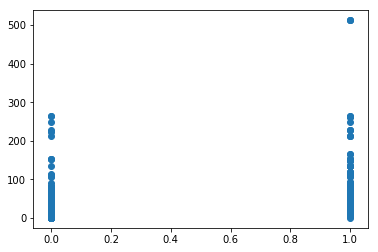

In [84]:
##para la reg lineal
reg = red [["Survived","Fare"]]
reg = reg.as_matrix()
x = reg[:,0]
y= reg[:,1]

plt.scatter(x,y)

In [85]:
X=red[["Survived"]]
Y= red[["Fare"]]
model = lm.LinearRegression()
res = model.fit(X,Y)

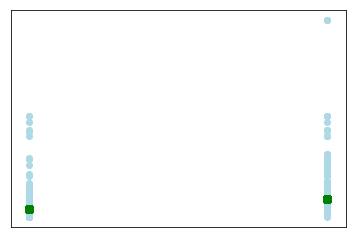

In [86]:
plt.scatter(X,Y, color="lightblue")
plt.scatter(X,res.predict(X),color ="green",linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

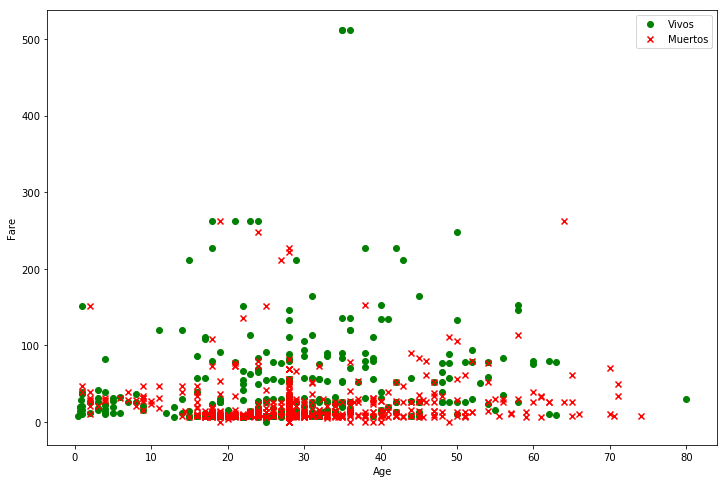

In [87]:
##regresion logistica
live = red[red["Survived"].isin([1])]
dead = red[red["Survived"].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(live["Age"], live["Fare"], c='g', marker='o', label='Vivos')
ax.scatter(dead["Age"], dead["Fare"], c='r', marker='x', label='Muertos')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Fare")

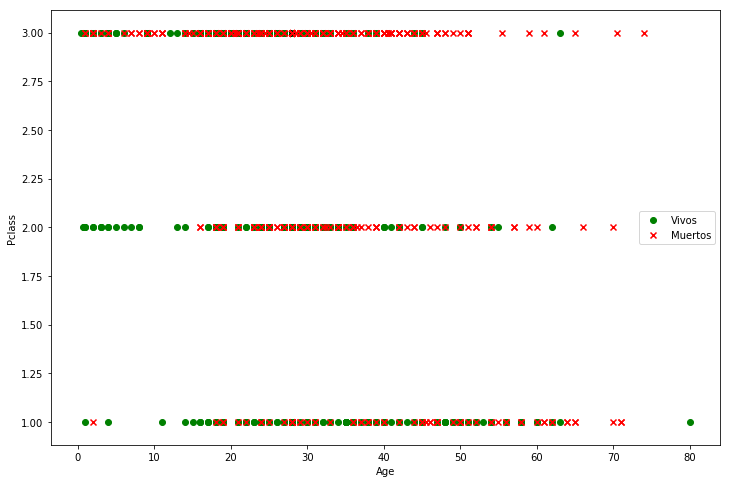

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(live["Age"], live["Pclass"], c='g', marker='o', label='Vivos')
ax.scatter(dead["Age"], dead["Pclass"], c='r', marker='x', label='Muertos')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Pclass")

In [89]:
#no se que hace pero es importante
def sigmoide(x):
    return 1 / (1 + np.exp(-x))
def costo(Teta, X, Y):
    Teta = np.matrix(Teta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    A = np.multiply(-Y, np.log(sigmoide(X * Teta.T)))
    B = np.multiply((1 - Y), np.log(1 - sigmoide(X * Teta.T)))
    return np.sum(A - B) / (len(X))

def gradient(teta, x, y):
    teta = np.matrix(teta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(teta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoide(x * teta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
    
    return grad

def predict(theta, X):
    probability = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [90]:
ex_data = red[["Age","Fare","Survived"]]
ex_data

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,28.0,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


In [91]:
##mates improtantes para la regresion 
cs = ex_data.shape[1]
X = ex_data.iloc[:,0:cs-1]
Y = ex_data.iloc[:,cs-1:cs]

X = np.array(X.values)
Y = np.array(Y.values)
Teta = np.zeros(2)


In [92]:
X.shape, Y.shape, Teta.shape


((891, 2), (891, 1), (2,))

In [93]:
costo(Teta,X,Y)

gradient(Teta, X, Y)

import scipy.optimize as opt
result = opt.fmin_tnc(func=costo, x0=Teta, fprime=gradient, args=(X, Y))
result

costo(result[0], X, Y)

0.6260464654372323

In [94]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 597%
